In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ \widehat{y}= ax+b $$
$$ MSE = \frac{1}{n}\sum_{i=0}^{n}(y-\widehat{y})^{2} $$

In [2]:
def mean_squared_error(y_true,y_predicted):
    cost = np.sum((y_true-y_predicted)**2)/len(y_true)
    return cost

이 함수는 실제 값(y_true)과 예측 값(y_predicted)을 받아서 평균 제곱 오차(MSE)를 계산합니다. 평균 제곱 오차는 실제 값과 예측 값의 차이의 제곱을 평균한 값으로, 모델의 예측 정확도를 평가하는 지표입니다.

$$
\theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$


$$ a\leftarrow a-\alpha \frac{\partial J}{\partial a} $$

In [67]:
def gradient_descent(x,y,iterations=1000,learning_rate=0.0001,
                     stopping_threshold=1e-20):
    current_weight=0.1
    current_bias=0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    
    costs=[]
    weights=[]
    previous_cost=None
    
    for i in range(iterations):
        y_predicted=(current_weight*x)+current_bias
        current_cost=mean_squared_error(y,y_predicted)
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
            
        previous_cost=current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        weight_derivative=-(2/n)*sum(x*(y-y_predicted))
        bias_derivative=-(2/n)*sum(y-y_predicted)

        #weight와 bias 갱신
        current_weight=current_weight-(learning_rate*weight_derivative)
        current_bias=current_bias-(learning_rate*bias_derivative)
        if i%100==0:
             print(f"Iteration {i+1}: Cost {current_cost}, Weight \
             {current_weight}, Bias {current_bias}")
    
    #시각화
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias

이 함수의 주요 단계를 설명하겠습니다:

current_weight와 current_bias는 초기 가중치와 편향 값을 나타냅니다.
iterations, learning_rate, stopping_threshold는 반복 횟수, 학습률, 중지 임계값을 설정하는 매개변수입니다.
for 루프를 통해 경사 하강법을 iterations번 반복합니다.
y_predicted를 현재 가중치와 편향을 사용하여 예측합니다.
current_cost는 mean_squared_error 함수를 사용하여 실제 값 y와 예측 값 y_predicted 사이의 평균 제곱 오차를 계산합니다.
이전 비용과 현재 비용의 차이가 stopping_threshold보다 작을 때 학습을 종료합니다.
이전 비용을 갱신하고, 비용과 가중치를 기록합니다.
비용 함수를 가중치와 편향에 대해 미분하여 변화율(gradient)인 weight_derivative와 bias_derivative를 계산합니다.
가중치와 편향을 업데이트합니다.
일정한 간격으로 현재 비용, 가중치, 편향 값을 출력합니다.
(생략된) 시각화 코드를 통해 비용과 가중치의 변화를 시각화합니다.
최종적으로 업데이트된 가중치와 편향 값을 반환합니다.
이 함수는 반복적으로 가중치와 편향을 업데이트하면서 비용 함수를 최소화하려는 목표를 가지고 있으며, 최종 결과로 업데이트된 가중치와 편향 값을 반환합니다.

In [69]:
 # Data
X = np.array([1,2,3,4,5,6,7,8,9,10])
y =[i*2+1 for i in X]

입력 데이터 X와 실제 값 y를 생성합니다. y는 간단한 식을 통해 생성되는 가상의 데이터입니다.

gradient_descent 함수를 호출하여 선형 회귀 모델을 훈련합니다.
훈련된 모델을 사용하여 예측 값을 계산합니다.
데이터와 회귀선을 시각화하여 훈련 결과를 확인합니다.

Iteration 1: Cost 160.65609999999998, Weight              0.115719, Bias 0.012288
Iteration 101: Cost 33.246828470482555, Weight              1.1985337186786975, Bias 0.17082914310316719
Iteration 201: Cost 6.945415912894224, Weight              1.6902733783914503, Bias 0.24445534555533932
Iteration 301: Cost 1.5154044147285295, Weight              1.9134635267393816, Bias 0.27949440745427495
Iteration 401: Cost 0.39382005531266057, Weight              2.0146411966135878, Bias 0.29699504148051803
Iteration 501: Cost 0.16161723746608483, Weight              2.0603843737453458, Bias 0.3065205985149654
Iteration 601: Cost 0.11301247819674176, Weight              2.080942257117344, Bias 0.3124161422789438
Iteration 701: Cost 0.10231294041885719, Weight              2.0900583369428998, Bias 0.3166558471755817
Iteration 801: Cost 0.09944363717733852, Weight              2.0939768598317188, Bias 0.3201366919083393
Iteration 901: Cost 0.09819623156896172, Weight              2.095534847943893,

Iteration 16101: Cost 0.02736234058917203, Weight              2.051323337833531, Bias 0.6426960386172017
Iteration 16201: Cost 0.02713347978386888, Weight              2.0511082508866276, Bias 0.6441934357354415
Iteration 16301: Cost 0.026906533188647264, Weight              2.050894065330721, Bias 0.6456845575296654
Iteration 16401: Cost 0.026681484792900657, Weight              2.050680777388245, Bias 0.6471694302986364
Iteration 16501: Cost 0.026458318719937, Weight              2.0504683832974635, Bias 0.6486480802309039
Iteration 16601: Cost 0.026237019225857798, Weight              2.0502568793124, Bias 0.650120533405266
Iteration 16701: Cost 0.02601757069844779, Weight              2.0500462617027777, Bias 0.6515868157912282
Iteration 16801: Cost 0.025799957656074367, Weight              2.0498365267539627, Bias 0.6530469532494634
Iteration 16901: Cost 0.025584164746593124, Weight              2.049627670766877, Bias 0.6545009715322664
Iteration 17001: Cost 0.025370176746267348

Iteration 28501: Cost 0.009656777444487362, Weight              2.0304897864222253, Bias 0.7877355228587869
Iteration 28601: Cost 0.009576007385530685, Weight              2.0303620091701964, Bias 0.7886250853902116
Iteration 28701: Cost 0.00949591289380784, Weight              2.030234767409821, Bias 0.7895109199238665
Iteration 28801: Cost 0.009416488318820162, Weight              2.0301080588969493, Bias 0.7903930420831257
Iteration 28901: Cost 0.00933772805733061, Weight              2.0299818813968358, Bias 0.7912714674258865
Iteration 29001: Cost 0.009259626552967934, Weight              2.029856232684099, Bias 0.7921462114448473
Iteration 29101: Cost 0.009182178295834668, Weight              2.0297311105426887, Bias 0.7930172895677802
Iteration 29201: Cost 0.009105377822118958, Weight              2.0296065127658376, Bias 0.7938847171577996
Iteration 29301: Cost 0.009029219713708275, Weight              2.0294824371560263, Bias 0.7947485095136377
Iteration 29401: Cost 0.00895369

Iteration 43301: Cost 0.002785897902681855, Weight              2.0163764916883964, Bias 0.8859897738374617
Iteration 43401: Cost 0.0027625964297899094, Weight              2.0163078607351723, Bias 0.8864675703428379
Iteration 43501: Cost 0.0027394898522809775, Weight              2.0162395174020187, Bias 0.8869433644883528
Iteration 43601: Cost 0.002716576540034546, Weight              2.0161714604835774, Bias 0.8874171646655404
Iteration 43701: Cost 0.002693854876564575, Weight              2.0161036887795305, Bias 0.8878889792307653
Iteration 43801: Cost 0.00267132325890523, Weight              2.0160362010945976, Bias 0.8883588165053734
Iteration 43901: Cost 0.0026489800974982313, Weight              2.015968996238503, Bias 0.8888266847758358
Iteration 44001: Cost 0.0026268238160803295, Weight              2.0159020730259614, Bias 0.8892925922938987
Iteration 44101: Cost 0.0026048528515725117, Weight              2.01583543027666, Bias 0.8897565472767243
Iteration 44201: Cost 0.002

Iteration 57401: Cost 0.0008523783719676277, Weight              2.009058462310012, Bias 0.9369365944611433
Iteration 57501: Cost 0.0008452490110858401, Weight              2.0090204999115375, Bias 0.9372008819360285
Iteration 57601: Cost 0.0008381792807486951, Weight              2.008982696606697, Bias 0.937464061829285
Iteration 57701: Cost 0.0008311686822015613, Weight              2.008945051728758, Bias 0.9377261387825905
Iteration 57801: Cost 0.0008242167208614678, Weight              2.008907564613784, Bias 0.9379871174181691
Iteration 57901: Cost 0.0008173229062820383, Weight              2.008870234600618, Bias 0.938247002338875
Iteration 58001: Cost 0.0008104867521191957, Weight              2.0088330610308702, Bias 0.9385057981282705
Iteration 58101: Cost 0.0008037077760965246, Weight              2.0087960432489185, Bias 0.9387635093507121
Iteration 58201: Cost 0.0007969854999715439, Weight              2.0087591806018823, Bias 0.9390201405514258
Iteration 58301: Cost 0.00

Iteration 65201: Cost 0.000442698354514734, Weight              2.0065281815659954, Bias 0.9545519595447551
Iteration 65301: Cost 0.00043899559006772783, Weight              2.0065008231224275, Bias 0.9547424241691721
Iteration 65401: Cost 0.00043532379583872196, Weight              2.0064735793332127, Bias 0.9549320905903483
Iteration 65501: Cost 0.00043168271279035226, Weight              2.006446449717855, Bias 0.9551209621534118
Iteration 65601: Cost 0.00042807208405182766, Weight              2.006419433797871, Bias 0.9553090421894704
Iteration 65701: Cost 0.000424491654900846, Weight              2.0063925310967847, Bias 0.9554963340156735
Iteration 65801: Cost 0.00042094117274568937, Weight              2.006365741140117, Bias 0.9556828409352671
Iteration 65901: Cost 0.0004174203871072968, Weight              2.006339063455376, Bias 0.9558685662376544
Iteration 66001: Cost 0.0004139290496015413, Weight              2.0063124975720497, Bias 0.956053513198455
Iteration 66101: Cost

Iteration 76401: Cost 0.00017280642591697282, Weight              2.004078666678992, Bias 0.9716050470783756
Iteration 76501: Cost 0.00017136105914846166, Weight              2.004061573715041, Bias 0.9717240452571608
Iteration 76601: Cost 0.00016992778154317192, Weight              2.0040445523846513, Bias 0.971842544735822
Iteration 76701: Cost 0.00016850649198641853, Weight              2.004027602387617, Bias 0.9719605476043222
Iteration 76801: Cost 0.00016709709020923004, Weight              2.0040107234249955, Bias 0.9720780559438655
Iteration 76901: Cost 0.00016569947678121813, Weight              2.0039939151990933, Bias 0.9721950718269352
Iteration 77001: Cost 0.0001643135531037117, Weight              2.003977177413466, Bias 0.9723115973173273
Iteration 77101: Cost 0.00016293922140270264, Weight              2.00396050977291, Bias 0.9724276344701909
Iteration 77201: Cost 0.00016157638472198078, Weight              2.0039439119834603, Bias 0.9725431853320607
Iteration 77301: C

Iteration 90801: Cost 5.155655171966184e-05, Weight              2.0022278205321453, Bias 0.9844903091851173
Iteration 90901: Cost 5.112532859725703e-05, Weight              2.0022184841339934, Bias 0.984555307530619
Iteration 91001: Cost 5.0697712259539494e-05, Weight              2.0022091868630203, Bias 0.9846200334796577
Iteration 91101: Cost 5.0273672539073265e-05, Weight              2.0021999285552496, Bias 0.9846844881737984
Iteration 91201: Cost 4.985317952074262e-05, Weight              2.002190709047392, Bias 0.9847486727498225
Iteration 91301: Cost 4.943620353966656e-05, Weight              2.0021815281768487, Bias 0.9848125883397455
Iteration 91401: Cost 4.90227151790276e-05, Weight              2.002172385781695, Bias 0.9848762360708414
Iteration 91501: Cost 4.86126852681203e-05, Weight              2.002163281700684, Bias 0.9849396170656586
Iteration 91601: Cost 4.820608488018513e-05, Weight              2.002154215773255, Bias 0.9850027324420407
Iteration 91701: Cost 4.

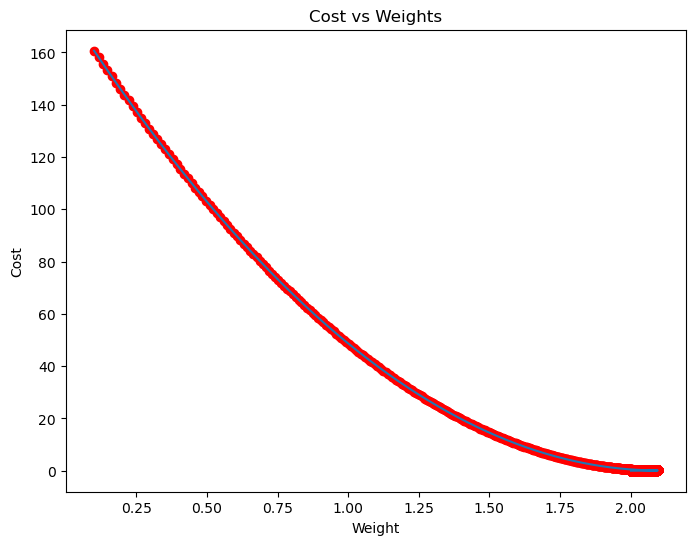

Estimated Weight:2.0015139165365756
 Estimated Bias:0.9894603819908172


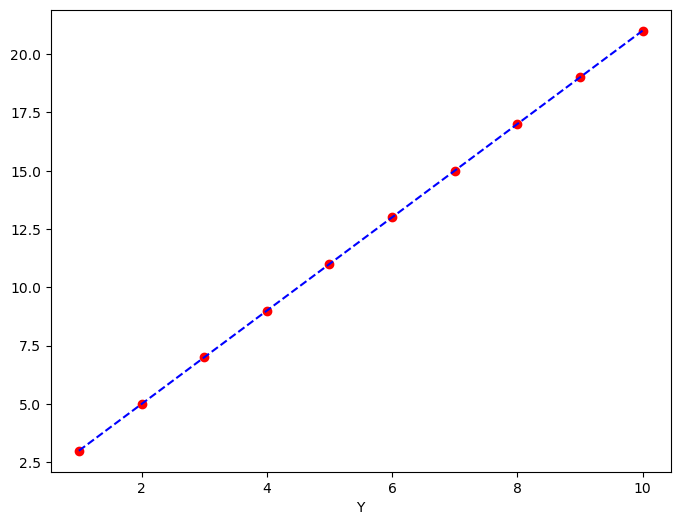

In [72]:
estimated_weight,estimated_bias=gradient_descent(X,y,iterations=100000)
print(f"Estimated Weight:{estimated_weight}\n Estimated Bias:{estimated_bias}")
Y_pred=estimated_weight*X+estimated_bias
#회귀선(regression line) 그리기
plt.figure(figsize=(8,6))
plt.scatter(X,y,marker='o',color='red')
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)],color='blue',markerfacecolor='red',
        markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.xlabel("Y")
plt.show()

이 부분은 경사 하강법을 통해 구한 회귀 모델의 결과를 출력하고, 데이터와 회귀선을 시각화하는 부분입니다.

estimated_weight와 estimated_bias는 gradient_descent 함수를 호출하여 얻은 가중치와 편향 값을 의미합니다. 이 값들은 훈련된 선형 회귀 모델의 결과입니다.

print 문을 사용하여 추정된 가중치와 편향 값을 출력합니다.

Y_pred는 훈련된 모델을 사용하여 입력 데이터 X에 대한 예측 값을 계산합니다. 이 값들은 회귀 모델이 예측한 결과입니다.

plt.figure() 함수를 사용하여 새로운 그림(플롯)을 생성합니다. 그림의 크기는 figsize 매개변수를 통해 조절할 수 있습니다.

plt.scatter() 함수를 사용하여 입력 데이터 X와 실제 값 y를 산점도로 표시합니다. 데이터 포인트는 빨간색 동그라미로 나타납니다.

plt.plot() 함수를 사용하여 회귀선을 그립니다. 회귀선은 입력 데이터의 범위에 해당하는 범위에서 Y_pred의 최솟값과 최댓값에 해당하는 값들을 연결하여 나타냅니다. 이때, 파란색 점선으로 그려집니다. markerfacecolor, markersize, linestyle 등의 속성을 사용하여 스타일을 설정할 수 있습니다.

plt.xlabel()와 plt.ylabel() 함수를 사용하여 x축과 y축에 라벨을 추가합니다.

plt.show() 함수를 사용하여 그림을 화면에 표시합니다.

이 부분은 훈련된 선형 회귀 모델의 결과를 시각적으로 확인하는 부분으로, 데이터 포인트와 회귀선을 함께 그려 전체적인 결과를 시각화합니다.

주어진 코드는 파이썬을 사용하여 경사 하강법을 구현하고, 이를 이용하여 선형 회귀 모델을 훈련하고 시각화하는 과정을 보여주고 있습니다. 코드를 순차적으로 분석해보겠습니다.

mean_squared_error 함수: 주어진 실제 값 y_true와 예측 값 y_predicted를 이용하여 평균 제곱 오차(Mean Squared Error, MSE)를 계산하는 함수입니다.

gradient_descent 함수: 경사 하강법을 구현하는 함수입니다. 입력 데이터 x와 실제 값 y를 사용하여 선형 회귀 모델의 파라미터를 업데이트하면서 비용 함수 값을 최소화합니다. 반복(iterations) 횟수나 학습률(learning_rate) 등을 설정할 수 있습니다.

초기값으로 current_weight와 current_bias를 설정합니다.
반복문을 통해 주어진 반복 횟수 동안 모델을 업데이트하고, 비용 함수의 변화를 확인합니다.
미분을 통해 파라미터의 변화 방향과 크기를 결정하고, 파라미터를 업데이트합니다.
비용 함수의 변화를 기록하여 시각화를 위해 저장합니다.
반복 중지 조건을 확인하고, 이를 만족하면 반복을 종료합니다.
학습 과정을 출력하며, 일정한 간격으로 현재 비용, 가중치, 편향 값을 출력합니다.
비용과 가중치 변화를 시각화하여 보여줍니다.
데이터 생성:

X는 입력 데이터를 나타내며, 1부터 10까지의 값이 저장되어 있습니다.
y는 예측하고자 하는 값으로, y = 2X + 1의 관계를 갖는 데이터가 저장되어 있습니다.
gradient_descent 함수를 호출하여 선형 회귀 모델을 훈련합니다.

훈련된 모델을 사용하여 예측 값을 계산합니다.

데이터와 회귀선을 시각화하여 훈련 결과를 확인합니다.

이 코드는 주어진 데이터에 대해 경사 하강법을 적용하여 선형 회귀 모델을 훈련하고, 그 결과를 시각화합니다. 코드의 각 부분이 세부적으로 어떤 역할을 하는지 파악하시면 됩니다.

User
편향은 뭐야

ChatGPT
편향(bias)은 머신 러닝과 통계학에서 사용되는 개념으로, 모델이 실제 데이터에서 얼마나 벗어난 예측을 하는지를 나타내는 값입니다. 간단히 말해서, 모델의 예측값과 실제값 사이의 차이를 나타내는 것입니다.

선형 회귀의 경우, 편향은 회귀 직선의 y절편을 의미합니다. 회귀 직선은 데이터를 가장 잘 설명하는 직선을 찾는 과정에서 그려지며, 이 직선의 y절편은 편향으로 표현됩니다.

예를 들어, 주어진 데이터가 x와 y의 관계를 나타낼 때, 선형 회귀 모델을 통해 구한 회귀 직선은 y = ax + b 형태가 됩니다. 이 때, a는 기울기를 나타내고, b는 y절편을 나타냅니다. 편향(bias)은 이 직선이 y축과 만나는 점을 나타내는 것으로, 모델이 어떤 데이터에서 예측을 하더라도 그 차이를 나타내는 값입니다.

편향을 고려하지 않은 모델은 데이터와 예측값이 멀리 떨어져 있는 경우 오차가 커질 수 있습니다. 따라서 편향을 조절하여 모델이 데이터를 더 정확하게 예측하도록 만드는 것이 중요합니다.

User
x,y로는 무엇을 받아

ChatGPT
gradient_descent 함수는 입력 데이터와 실제 값인 x와 y를 받아들입니다. 이들은 선형 회귀 모델을 훈련하는 데 사용되는 데이터입니다.

x: 입력 데이터입니다. 예를 들어, 주어진 데이터셋에서 각 데이터 포인트의 특징(feature) 값을 나타냅니다. 리스트나 배열 형태로 제공됩니다.
y: 실제 값(타깃)입니다. 입력 데이터 x에 대응하는 실제 결과값(라벨, 정답)을 나타내며, x와 같은 크기의 리스트나 배열로 제공됩니다.
함수 내부에서는 이러한 x와 y를 사용하여 경사 하강법을 적용하여 선형 회귀 모델의 가중치와 편향을 업데이트하고, 훈련 과정에서 예측 값을 계산하며 비용 함수를 최소화하는 작업을 수행합니다. 이를 통해 최종적으로 업데이트된 가중치와 편향 값을 반환합니다.

User
가중치는 뭐야

ChatGPT
가중치(weight)는 머신 러닝과 인공 신경망에서 사용되는 개념으로, 입력 특징(feature)과 이에 대응하는 모델의 파라미터 사이의 연결을 나타내는 값입니다. 가중치는 입력 특징의 중요도를 나타내며, 모델이 입력 데이터를 어떻게 변형하여 예측을 수행하는지를 결정합니다.

선형 회귀의 경우, 가중치는 각 입력 특징의 영향력을 조절하는 역할을 합니다. 예를 들어, 입력 특징 x와 예측값 y 사이의 관계를 선형 회귀로 모델링하면 y = ax + b와 같은 식이 됩니다. 이 때, a가 가중치에 해당하며, x의 영향력을 나타냅니다.

가중치는 데이터를 모델에 입력하고 예측을 만들 때 중요한 역할을 합니다. 데이터의 각 특징은 모델의 가중치와 곱해져서 예측값을 만들어내는데, 이 때 각 특징의 가중치가 예측에 미치는 영향을 조절합니다. 가중치가 크면 해당 특징이 예측에 미치는 영향도 커지며, 가중치가 작으면 그 영향도 작아집니다.

머신 러닝에서 가중치는 학습 과정을 통해 데이터와 모델의 오차를 최소화하도록 조정되며, 최적의 가중치는 모델이 주어진 데이터에서 더 정확한 예측을 할 수 있도록 합니다.




